![Clase aprendizaje no supervisado](https://raw.githubusercontent.com/MECA4605-Aprendizaje-no-supervisado/taller_1/main/figs/taller-meca-aprendizaje%20no%20supervisado_banner%201169%20x%20200%20px%20-05.png)

# Caso-taller:  PCA para estudiar la dimensionalidad de la calidad de vida en las ciudades

En este caso-taller vamos a aplicar PCA en el estudio de calidad de vida en diferentes ciudades. Para ello, haremos uso de los datos que surgen del Almanaque Calificado de Lugares. En este Almanaque Boyer y Savageau calificaron 329 ciudades de acuerdo con los siguientes nueve criterios:

   - Clima y Terreno
   - Alojamiento
   - Cuidado de la salud y el medio ambiente
   - Crimen
   - Transporte
   - Educación
   - Artes
   - Recreación
   - Economía

Con tantas variables disponibles, la matriz de dispersión puede resultar muy grande para estudiarla e interpretarla adecuadamente. Habría demasiadas correlaciones bivariadas entre las variables a considerar. Para interpretar los datos de una forma más significativa es necesario reducir el número de variables a unas pocas dimensiones, y para ello en este ejercicio recurriremos al análisis de componentes principales.


## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo junto al archivo de soporte.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en la misma ruta de acceso del cuaderno, por ejemplo: `data/archivo_de_soporte.csv`.

## Desarrollo


### 1. Carga de datos

En el repositorio de taller 1 encontraran una carpeta `data` donde se encuentra el archivo `lugares.csv`, cargue estos datos en su *cuaderno*.


In [160]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/MECA4605-Aprendizaje-no-supervisado/taller_1/refs/heads/main/data/lugares.csv')
df.head()

,Ciudad,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
0,"Abilene,TX",521,6200,237,923,4031,2757,996,1405,7633
1,"Akron,OH",575,8138,1656,886,4883,2438,5564,2632,4350
2,"Albany,GA",468,7339,618,970,2531,2560,237,859,5250
3,"Albany-Schenectady-Troy,NY",476,7908,1431,610,6883,3399,4655,1617,5864
4,"Albuquerque,NM",659,8393,1853,1483,6558,3026,4496,2612,5727


Importamos la librería pandas para poder crear un dataframe a partir de los datos usando la instrucción "pd.read_csv", se usó la URL de los datos raw alojados en el repositorio del taller 1 por lo que en teoría este jupyter notebook debe poderse usar en cualquier lugar siempre y cuando el repositorio se mantenga público.

### 2.  Análisis descriptivo de las variables.

Para el análisis descriptivo haga uso de estadísticas descriptivas y matrices de correlación. Indique además cuantas gráficas de dispersión bivariadas debería examinar con este número de variables.

Explique porqué es importante conocer las estadísticas descriptivas y como contribuyen al ejercicio posterior de Análisis de Componentes Principales.

Tenga en cuenta que para las variables, a excepción de la alojamiento y crimen, cuanto mayor sea el puntaje, mejor. Por el contrario; para alojamiento y crimen, mientras más bajo sea el puntaje, mejor. También, mientras algunas comunidades podrían calificar mejor en las artes, otras podrían calificar mejor en otras áreas como tener una tasa de criminalidad más baja y buenas oportunidades educativas.

In [161]:
# Transformamos las variables "alojamiento" y "crimen" para que, a mayor puntaje, sean mejores. 
# Esto lo logramos multiplicando las variables por -1, con esto, todos los números quedarán negativos y entre mas cercanas al cero (mayores) mejor la calificación.
# Esta transformación no afectará al PCA ya que estandarizaremos los datos.

df["Alojamiento"] = df["Alojamiento"]*-1
df["Crimen"] = df["Crimen"]*-1

In [162]:
# Creamos un data frame con estadísticas descriptivas para cada columna
df_descriptive_stats = df.describe().round(2)

# mostramos el data frame
df_descriptive_stats.T

,count,mean,std,min,25%,50%,75%,max
Clima y Terreno,329.0,538.73,120.81,105.0,480.0,542.0,592.0,910.0
Alojamiento,329.0,-8346.56,2385.26,-23640.0,-9015.0,-7877.0,-6760.0,-5159.0
Cuidado de la salud y el medio ambiente,329.0,1185.74,1003.00,43.0,583.0,833.0,1445.0,7850.0
Crimen,329.0,-961.05,357.15,-2498.0,-1156.0,-947.0,-707.0,-308.0
Transporte,329.0,4210.08,1451.18,1145.0,3141.0,4080.0,5205.0,8625.0
Educación,329.0,2814.89,320.79,1701.0,2619.0,2794.0,3012.0,3781.0
Artes,329.0,3150.88,4642.28,52.0,778.0,1871.0,3844.0,56745.0
Recreación,329.0,1845.96,807.89,300.0,1316.0,1670.0,2176.0,4800.0
Economía,329.0,5525.36,1084.47,3045.0,4842.0,5384.0,6113.0,9980.0


La base de datos está compuesta por 329 ciudades sin embargo, los rangos de datos entre observaciones para las distintas variables parecen diferir, por ejemplo, el rango de calificación para "Clima y Terreno" (min 105, max= 910) difiere mucho al rango de calificación de "Artes" (min  = 52, max= 56.745), por lo que, por ahora no podemos comparar estas variables entre si, sin embargo, según cuartiles y medias podemos hacer análisis separados para las variables como sigue:

**Clima y terreno**: Mediana y Media se encuentran muy cerca, es posible que tenga distribución no sesgada, muchos datos se encuentran entre percentil 50 y 75. 

**Alojamiento:** Distribución sesgada a la derecha, el máximo se encuentra bastante alejado del percentil 75, posible presencia de outliers. 

**Cuidado de la salud y medio ambiente:**  Distribución sesgada a la derecha  

**Crimen:** Mediana y Media se encuentran muy cerca, es posible que tenga distribución no sesgada.  

**Transporte:** Distribución ligeramente sesgada a la derecha  

**Educación:** Mediana y Media se encuentran muy cerca, es posible que tenga distribución no sesgada.  

**Artes:** Distribución altamente sesgada a la derecha, el máximo se encuentra bastante alejado del percentil 75, posible presencia de outliers.

**Recreación:** Distribución ligeramente sesgada a la derecha.  

**Economía:** Mediana y Media se encuentran muy cerca, es posible que tenga distribución no sesgada.  

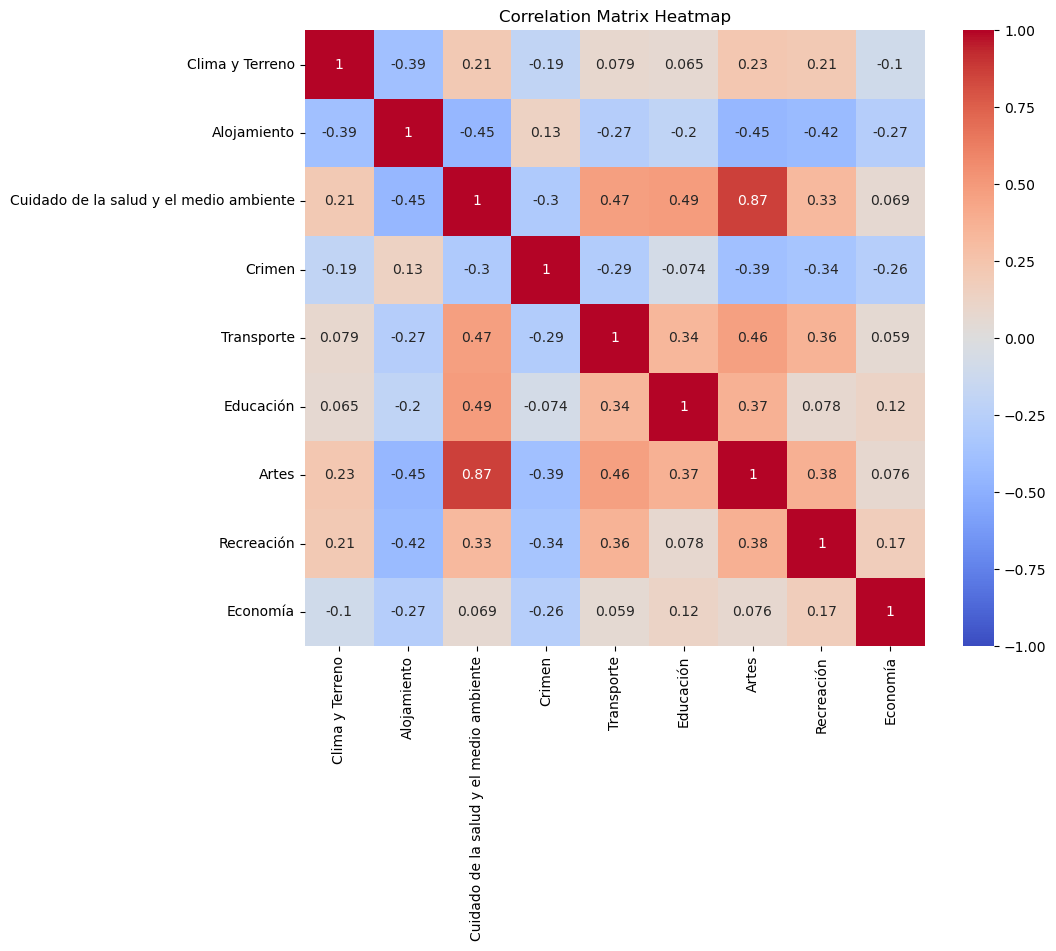

In [163]:
# Calculamos la matriz de correlacion
correlation_matrix = df.select_dtypes(include=['number']).corr()
correlation_matrix

# Importamos matplotlib y seaborn para visualizar datos
import seaborn as sns
import matplotlib.pyplot as plt

# Creamos un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

La única correlación fuerte a destacar está entre "Cuidado de la salud y el medio ambiente" y "Artes", en cuanto a las otras correlaciones, son debiles en su mayoría (no superan el 0.5).

Es importante hacer los análisis previos porque ya de antemano sabemos donde se encuentran las correlaciones principales en caso de que querramos evaluar cuales son las mejores ciudades para vivir. Dada esta correlación, es posible que las componentes principales capturen la varianza de estas más facilmente, sin embargo, como la gran mayoría no están correlacionadas, es posible que tengamos que usar muchas componentes principales.

### 3.  Cálculo y selección de componentes principales.

Utilizando Álgebra Lineal, calcule los eigen valores y los eigen vectores, a partir de ellos obtenga los Componentes Principales. Tenga en cuenta de estandarizar las variables y explicar por qué es importante no omitir este paso.

Luego, examine los valores propios para determinar cuántos componentes principales se deben considerar. Explique el criterio que utilizó para la elección y justifique su respuesta.

In [164]:
#Cargamos las librerías a utilizar
import numpy as np
import pandas as pd

df = df.set_index("Ciudad")
df.head()

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
Ciudad,,,,,,,,,
"Abilene,TX",521,-6200,237,-923,4031,2757,996,1405,7633
"Akron,OH",575,-8138,1656,-886,4883,2438,5564,2632,4350
"Albany,GA",468,-7339,618,-970,2531,2560,237,859,5250
"Albany-Schenectady-Troy,NY",476,-7908,1431,-610,6883,3399,4655,1617,5864
"Albuquerque,NM",659,-8393,1853,-1483,6558,3026,4496,2612,5727


Iniciamos por estandarizar los datos, esto es importante dado que queremos que las magnitudes y centralización de las variables sean comparables entre sí, y a su vez, sus varianzas; si dejamos los datos como están originalmente, la varianza de variables cuyas unidades sean mayores pueden predominar en el PCA.

In [165]:
# Estandarizamos la base de datos para poder aplicar PCA
# Guardamos los datos originales en el dataframe "df_original", de aqui en adelante "df" será el dataframe estandarizado.
df_original = df 
mu = df.mean()
sigma = df.std()
df = (df - mu)/sigma
df.head()

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
Ciudad,,,,,,,,,
"Abilene,TX",-0.146782,0.899926,-0.945899,0.106550,-0.123405,-0.180451,-0.464186,-0.545815,1.943473
"Akron,OH",0.300207,0.087437,0.468854,0.210147,0.463704,-1.174862,0.519812,0.972960,-1.083816
"Albany,GA",-0.585494,0.422410,-0.566039,-0.025046,-1.157047,-0.794555,-0.627683,-1.221651,-0.253917
"Albany-Schenectady-Troy,NY",-0.519273,0.183862,0.244527,0.982922,1.841894,1.820839,0.324003,-0.283402,0.312259
"Albuquerque,NM",0.995524,-0.019470,0.665264,-1.461400,1.617938,0.658096,0.289753,0.948204,0.185930


In [166]:
# Halamos la matriz de Covarianzas
S = df.cov()
S.head()

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
Clima y Terreno,1.000000,-0.386291,0.213303,-0.192387,0.079120,0.064520,0.226974,0.213509,-0.100083
Alojamiento,-0.386291,1.000000,-0.453010,0.134222,-0.271922,-0.197934,-0.448568,-0.422288,-0.269433
Cuidado de la salud y el medio ambiente,0.213303,-0.453010,1.000000,-0.304659,0.470317,0.490234,0.865796,0.325397,0.069271
Crimen,-0.192387,0.134222,-0.304659,1.000000,-0.286578,-0.074416,-0.389483,-0.344627,-0.259995
Transporte,0.079120,-0.271922,0.470317,-0.286578,1.000000,0.335992,0.464806,0.364716,0.059247


In [167]:
# Hallamos los eigenvalores y eigenvectores
eig_val, eig_vec = np.linalg.eig(S)
eig_val

array([3.4082918 , 1.21397617, 1.14147915, 0.92091782, 0.75328488,
       0.6305619 , 0.49304772, 0.31803849, 0.12040208])

In [168]:
# Mostramos los vectores
eig_vec.T

array([[ 2.06413954e-01, -3.56521608e-01,  4.60214647e-01,
        -2.81298380e-01,  3.51150781e-01,  2.75292636e-01,
         4.63054489e-01,  3.27887907e-01,  1.35412251e-01],
       [-2.17835308e-01,  2.50624000e-01,  2.99465282e-01,
         3.55342273e-01,  1.79604477e-01,  4.83382093e-01,
         1.94789920e-01, -3.84474638e-01, -4.71283277e-01],
       [ 6.89955982e-01, -2.08172230e-01,  7.32492550e-03,
         1.85104981e-01, -1.46376283e-01, -2.29702548e-01,
         2.64842979e-02,  5.08526400e-02, -6.07314475e-01],
       [-1.37321246e-01,  5.11828708e-01, -1.47018320e-02,
        -5.39050473e-01,  3.02903705e-01, -3.35411034e-01,
         1.01080391e-01,  1.89800816e-01, -4.21769940e-01],
       [-3.69149929e-01, -2.33487781e-01, -1.03240518e-01,
         5.23939687e-01,  4.04348475e-01, -2.08819059e-01,
        -1.05097637e-01,  5.29540576e-01, -1.59620056e-01],
       [-3.74604694e-01, -1.41639825e-01,  3.73848037e-01,
         8.09232850e-02, -4.67591803e-01, -5.021698

In [169]:
# Almacenamos la traspuesta del eigenvector
eig_vec=eig_vec.T

# Creamos un df llamado f, en este almacenaremos las 9 componentes principales
f = pd.DataFrame()
for i in range(0,9):
    eig_vec[[i]].round(2)
    f[i]=df.dot(eig_vec[[i]].T) #calculamos f1

f.columns = ['CP1','CP2','CP3','CP4','CP5','CP6','CP7','CP8','CP9'] # nombramos la columna del primer componente como CP1
f.head()


,CP1,CP2,CP3,CP4,CP5,CP6,CP7,CP8,CP9
Ciudad,,,,,,,,,
"Abilene,TX",-1.040180,-0.893769,-1.436654,-0.509834,-0.565136,-0.497854,0.423751,1.001776,0.347404
"Akron,OH",0.439814,-0.075066,1.154717,1.112207,0.996884,0.628547,0.011895,0.418746,-0.121685
"Albany,GA",-1.875539,-0.069792,-0.073347,0.046232,-0.679524,0.714097,0.239494,-0.441897,-0.094201
"Albany-Schenectady-Troy,NY",0.910741,1.817582,-1.096147,-0.573581,0.769080,-1.271237,0.458716,0.371496,0.317277
"Albuquerque,NM",2.149248,-0.328858,-0.019738,1.031502,-0.238550,-1.284224,0.154544,0.148264,-0.307153


(Utilice este espacio para describir el procedimiento, análisis, y conclusiones).

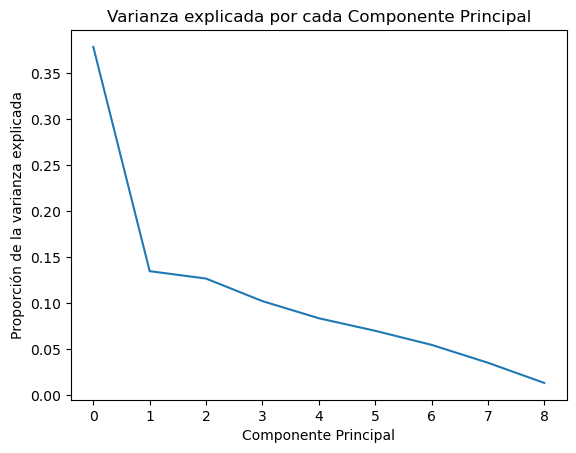

In [170]:
import matplotlib.pyplot as plt
vector = np.sort(eig_val)[::-1]/sum(eig_val)

# Graficar el vector
plt.plot(vector)
plt.title('Varianza explicada por cada Componente Principal')
plt.xlabel('Componente Principal')
plt.ylabel('Proporción de la varianza explicada')
plt.show()

In [171]:
vectoracumulado = vector
vectoracumulado

array([0.37869909, 0.13488624, 0.12683102, 0.1023242 , 0.08369832,
       0.07006243, 0.05478308, 0.03533761, 0.01337801])

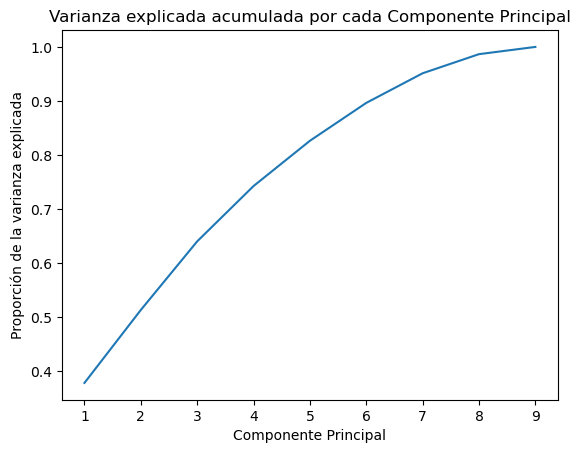

In [172]:
for i in range(1,9):
    vectoracumulado[i] = vectoracumulado[i] + vectoracumulado[i-1]

# Graficar el vector
x_values = np.arange(1, len(vector) + 1)
plt.plot(x_values, vectoracumulado)
plt.title('Varianza explicada acumulada por cada Componente Principal')
plt.xlabel('Componente Principal')
plt.ylabel('Proporción de la varianza explicada')
plt.show()


En nuestro análisis gráfico de la "Varianza explicada por cada Componente Principal" el codo no es tan fácil de escoger; sin embargo, en la explicación gráfica de "Varianza explicada acumulada por cada Componente Principal" vemos que con el 4to componente ya se explica mas del 70% de la varianza, teniendo en cuenta que la idea del PCA es reducir la dimensión y para este ejercicio ya usamos 9 variables, entre menos componentes escojamos, mas propósito tendrá el PCA, por lo que consideramos que con 4 componentes es suficiente.

### 4.  Interpretación de los componentes principales.

Logró reducir la dimensión en el ejercicio anterior? Si lo hizo, pueden los pesos obtenidos identificar dimensiones menores de los datos? Provea una interpretación a estas dimensiones, para ello puede utilizar gráficas y/o tablas.

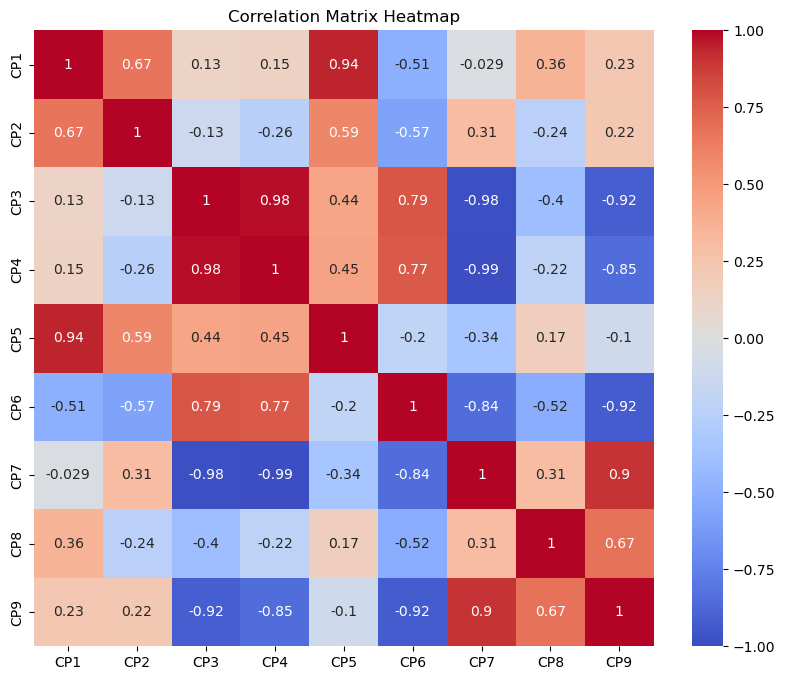

In [174]:
# Utilice este espacio para escribir el código.

# Calculamos la matriz de correlacion
correlation_matrix2 = f[:4].select_dtypes(include=['number']).corr()
correlation_matrix2

# Creamos un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

(Utilice este espacio para describir el procedimiento, análisis, y conclusiones).

### 5.   Detección de ciudades inusuales.

A partir de los Componentes Principales identifique las 5 ciudades calidad de vida inusualmente alta. En la distribución de calidad de vida  de la muestra que tan inusuales son? Cuáles son las dimensiones que hacen que estas ciudades tengan esta calidad de vida inusual?

In [48]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis, y conclusiones).